In [8]:
import pandas as pd
import matplotlib.pyplot as mp
import sklearn as sk
from pandas .plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [16]:
data = pd.read_parquet("./yellow_tripdata_2022-11.parquet", engine="fastparquet")
print(data.shape)
data.head(5)


(3252717, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.6,1.0,N,151,151,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0
1,1,2022-11-01 00:39:43,2022-11-01 00:48:44,0.0,1.8,1.0,N,90,79,1,8.5,3.0,0.5,3.05,0.0,0.3,15.35,2.5,0.0
2,1,2022-11-01 00:55:01,2022-11-01 01:01:35,0.0,2.0,1.0,N,137,141,1,8.0,3.0,0.5,2.36,0.0,0.3,14.16,2.5,0.0
3,1,2022-11-01 00:24:49,2022-11-01 00:31:04,2.0,1.0,1.0,N,158,113,1,6.0,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0
4,1,2022-11-01 00:37:32,2022-11-01 00:42:23,2.0,0.8,1.0,N,249,158,2,5.5,3.0,0.5,0.00,0.0,0.3,9.30,2.5,0.0


In [23]:
#describe with normal notation
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
VendorID,3252717.0,1.778041,0.447742,1.00,2.00,2.00,2.00,6.00
passenger_count,3130759.0,1.392939,0.933150,0.00,1.00,1.00,1.00,9.00
trip_distance,3252717.0,6.346792,654.688940,0.00,1.10,1.89,3.59,305756.36
RatecodeID,3130759.0,1.367043,5.203415,1.00,1.00,1.00,1.00,99.00
PULocationID,3252717.0,166.304893,64.684641,1.00,132.00,162.00,234.00,265.00
DOLocationID,3252717.0,163.840763,69.784166,1.00,114.00,162.00,234.00,265.00
payment_type,3252717.0,1.186218,0.543390,0.00,1.00,1.00,1.00,5.00
fare_amount,3252717.0,15.159421,14.564263,-1274.00,7.00,10.50,17.00,1274.00
extra,3252717.0,0.834000,1.152385,-5.50,0.00,0.50,1.00,14.35
mta_tax,3252717.0,0.486834,0.100948,-0.50,0.50,0.50,0.50,16.55


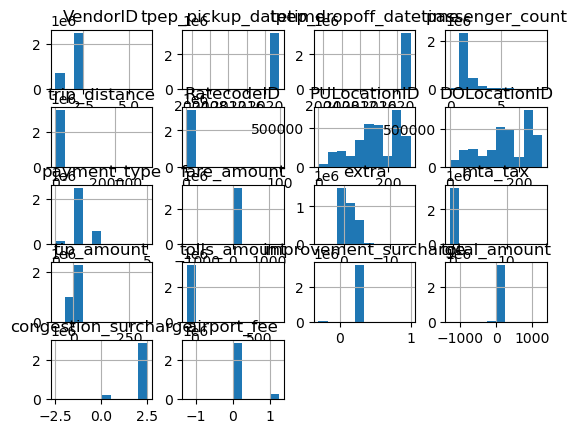

AttributeError: 'NoneType' object has no attribute 'transpose'

In [25]:

data.hist()
# TODO make readable
mp.show()